<a href="https://colab.research.google.com/github/jehianth/CNN_Soto_MakananIndonesia/blob/main/CNN_Soto_MakananIndonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Studi Kasus Klasifikasi Jenis Makanan Tradisional Soto dengan Menggunakan *Convolutional Neural Network***

---

Mata Kuliah: Kecerdasan Buatan B

Kelompok X:

1.   Jehian Athaya Tsani Az Zuhry (H1D022006)
2.   List item



In [ ]:
#   import drive ke project
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#   menyiapkan direktori
base_dir = '/content/drive/My Drive/Dataset_Colab/CNN_Soto_MakananIndonesia/'
!ls "/content/drive/My Drive/Dataset_Colab/CNN_Soto_MakananIndonesia/"

bahan  latih  validasi


In [ ]:
#   menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
latih_dir = os.path.join(base_dir, 'latih')
validasi_dir = os.path.join(base_dir, 'validasi')

In [ ]:
#   menentukan direktori isi bahan
sotosokaraja_dir = os.path.join(bahan_dir, 'sotosokaraja/')
cotomakassar_dir = os.path.join(bahan_dir, 'cotomakassar/')

print("Jumlah data latih tiap kelas")
print('Jumlah gambar Soto Sokaraja: ', len(os.listdir(sotosokaraja_dir)))
print('Jumlah gambar Coto Makassar: ', len(os.listdir(cotomakassar_dir)))


Jumlah data latih tiap kelas
Jumlah gambar Soto Sokaraja:  100
Jumlah gambar Coto Makassar:  100


In [ ]:
#   Direktori isi latih
latih_sotosokaraja = os.path.join(latih_dir, 'sotosokaraja/')
latih_cotomakassar = os.path.join(latih_dir, 'cotomakassar/')

#   Direktori isi validasi
validasi_sotosokaraja = os.path.join(validasi_dir, 'sotosokaraja/')
validasi_cotomakassar = os.path.join(validasi_dir, 'cotomakassar/')

In [ ]:
#   menyiapkan dataset
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#   jumlah pembagian data training dan testing
#   perbandingan 90(banyaknya folder training):10(banyaknya data pada folder validasi)
train_ratio = 0.9

#   pembagian training dan validasi
#   training
source_00 = sotosokaraja_dir
train_00 = latih_sotosokaraja
val_00 = validasi_sotosokaraja
train_val_split(source_00, train_00, val_00, train_ratio)

#   validasi
source_01 = cotomakassar_dir
train_01 = latih_cotomakassar
val_01 = validasi_cotomakassar
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
print('Jumlah Semua Soto Sokaraja:', len(os.listdir(sotosokaraja_dir)))
print('Jumlah Train Soto Sokaraja:', len(os.listdir(latih_sotosokaraja)))
print('Jumlah Val Soto Sokaraja:', len(os.listdir(validasi_sotosokaraja)))

print('Jumlah Semua Coto Makassar:', len(os.listdir(cotomakassar_dir)))
print('Jumlah Train Coto Makassar:', len(os.listdir(latih_cotomakassar)))
print('Jumlah Val Coto Makassar:', len(os.listdir(validasi_cotomakassar)))

Jumlah Semua Soto Sokaraja: 100
Jumlah Train Soto Sokaraja: 90
Jumlah Val Soto Sokaraja: 10
Jumlah Semua Coto Makassar: 100
Jumlah Train Coto Makassar: 90
Jumlah Val Coto Makassar: 10


In [ ]:
#   pre-processing
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
#   target
train_generator = train_datagen.flow_from_directory(
    latih_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validasi_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#   model cnn
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed = 112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed = 112),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 9,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/50
9/9 [==============================] - 13s 1s/step - loss: 0.7015 - acc: 0.5000 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 2/50
9/9 [==============================] - 10s 1s/step - loss: 0.6905 - acc: 0.5278 - val_loss: 0.6980 - val_acc: 0.5000
Epoch 3/50
9/9 [==============================] - 14s 2s/step - loss: 0.6962 - acc: 0.4889 - val_loss: 0.6865 - val_acc: 0.6000
Epoch 4/50
9/9 [==============================] - 11s 1s/step - loss: 0.6880 - acc: 0.5611 - val_loss: 0.6674 - val_acc: 0.5000
Epoch 5/50
9/9 [==============================] - 13s 1s/step - loss: 0.6839 - acc: 0.5944 - val_loss: 0.6887 - val_acc: 0.5000
Epoch 6/50
9/9 [==============================] - 12s 1s/step - loss: 0.6788 - acc: 0.5167 - val_loss: 0.6869 - val_acc: 0.5000
Epoch 7/50
9/9 [==============================] - 11s 1s/step - loss: 0.6459 - acc: 0.6278 - val_loss: 0.6269 - val_acc: 0.6500
Epoch 8/50
9/9 [==============================] - 11s 1s/step - loss: 0.6519 - acc: 0.5944 - val_loss: 0

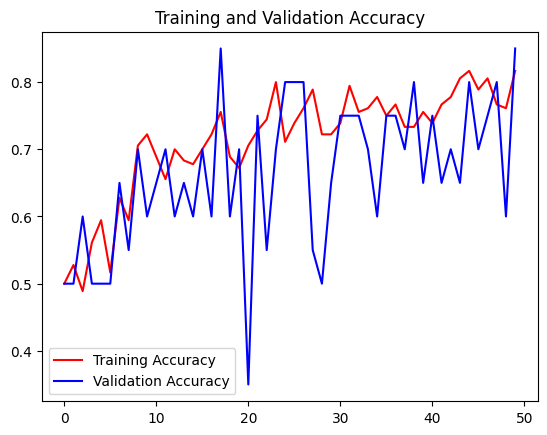

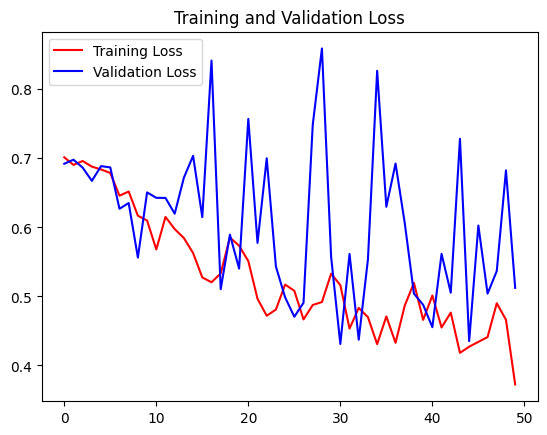

In [ ]:
#   tingkat akurasi dan loss model
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()

Saving 90.png to 90.png
1/1 [==============================] - 0s 32ms/step
90.png
This image belongs to class sotosokaraja


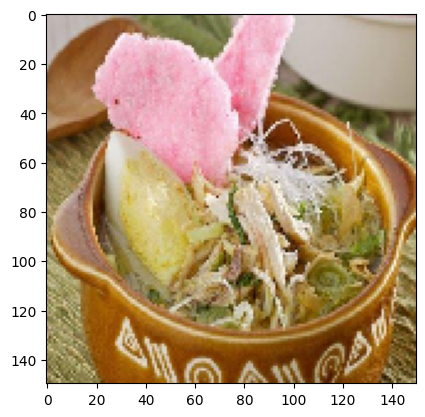

In [ ]:
import numpy as np
import keras.utils as image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  #   predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(latih_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j])
      break